# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__

## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


warnings.filterwarnings(action="ignore")


In [2]:
df=pd.read_csv('../Dataset/Supermarket_sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
import usefull_function as u 

In [4]:
dir(u)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'basic_info',
 'count_plot',
 'create_piechart',
 'missing_data',
 'np',
 'pd',
 'plt',
 'sns',
 'violin_plot']

# EDA for BigMart Sales Data.

In [5]:
u.basic_info(df)

Shape of the DataFrame: (8523, 12)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size      

In [6]:
u.missing_data(df)

,Total,Percent,Data_Type
Outlet_Size,2410,28.28,object
Item_Weight,1463,17.17,float64
Item_Identifier,0,0.00,object
Item_Fat_Content,0,0.00,object
Item_Visibility,0,0.00,float64
Item_Type,0,0.00,object
Item_MRP,0,0.00,float64
Outlet_Identifier,0,0.00,object
Outlet_Establishment_Year,0,0.00,int64
Outlet_Location_Type,0,0.00,object


In [7]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
1%,5.150000,0.000000,35.062752,1985.000000,83.890800
2%,5.440000,0.000000,37.219000,1985.000000,115.476352
3%,5.655000,0.000000,38.750600,1985.000000,145.583828
4%,5.820000,0.000000,40.466096,1985.000000,169.699104
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
25%,8.773750,0.026989,93.826500,1987.000000,834.247400


### Showing count plot of Items that contain fats type :-

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

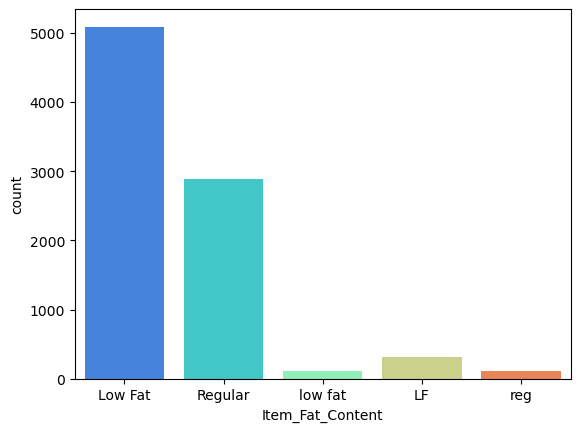

In [8]:
sns.countplot(data=df,x='Item_Fat_Content',palette="rainbow")

### Violin plot between 'Item_Fat_Content' and 'Item_Outlet_Sales'.
By examining the violin plot, one can gain insights into the distribution of sales amounts for different categories of fat content items, such as the range of sales, the central tendency of sales, and the presence of any outliers. This can help in understanding the relationship between the fat content of items and their sales performance in the outlet.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


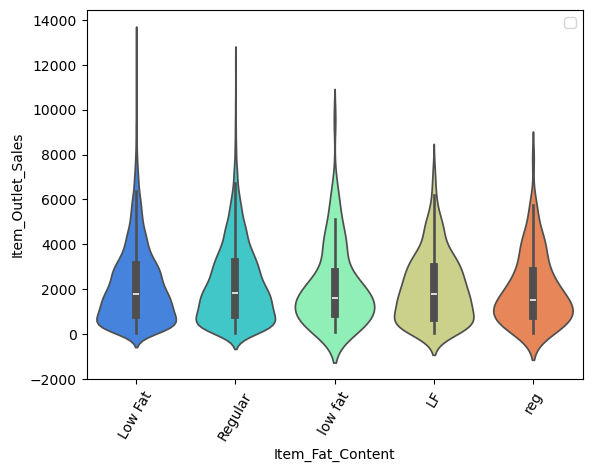

In [9]:
u.violin_plot(df, x='Item_Fat_Content',y='Item_Outlet_Sales')

### Bar plot between 'Item_Fat_Content' and 'Item_Visibility'
By examining the bar plot, one can easily compare the Item_Visibility values across different categories of Item_Fat_Content and identify any differences or trends. This can provide insights into how the fat content of items may affect their visibility or display in a store, which can be useful for understanding consumer behavior and making business decisions.

In [10]:
u.barplot_plot(df,x='Item_Fat_Content',y='Item_Visibility')

AttributeError: module 'usefull_function' has no attribute 'barplot_plot'

# Pie plot 
By examining the pie plot, one can easily understand the distribution of items across different categories in terms of proportions or percentages. This can provide insights into the popularity or sales performance of different types of items in the store, which can be useful for product management, inventory planning, and marketing strategies.

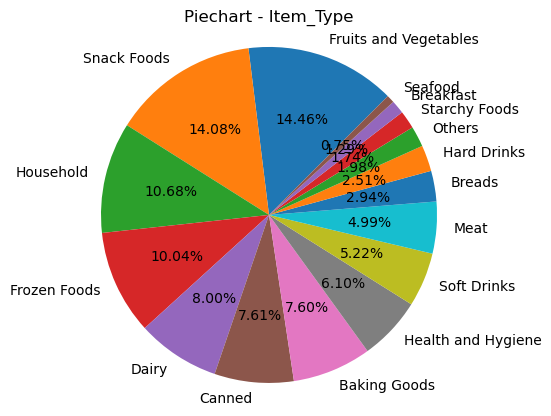

In [11]:
u.create_piechart(data=df, column="Item_Type" )

In [ ]:
u.count_plot(df=df,x='Outlet_Identifier')

# Scatterplot between Outlet_identifier and item type
The scatterplot can help visualize the distribution and relationship between these variables. For example, it can show how different types of items (Item_Type) are distributed across different outlets (Outlet_Identifier) based on their size (Outlet_Size). It can also identify any patterns or trends in the data, such as the concentration of certain types of items in specific outlets or the relationship between item types and outlet sizes. This can provide insights into the distribution and characteristics of items and outlets, which can be useful for business analysis and decision-making.

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,y='Outlet_Identifier',x='Item_Type',hue='Outlet_Size')
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [ ]:
df.columns

The scatterplot can help visualize the distribution and relationship between these variables. For example, it can show how different types of items (Item_Type) are distributed across different outlets (Outlet_Identifier) based on their size (Outlet_Size). It can also identify any patterns or trends in the data, such as the concentration of certain types of items in specific outlets or the relationship between item types and outlet sizes. This can provide insights into the distribution and characteristics of items and outlets, which can be useful for business analysis and decision-making.

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size')
plt.legend()
plt.show()

## Missing value Treatment

In [12]:


def univariate_cat(data, x):
    missing = data[x].isnull().sum()
    unique_cnt = data[x].nunique()
    unique_cat = list(data[x].unique())
    f1 = pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x: "Count"}, inplace=True)
    f2 = pd.DataFrame(data[x].value_counts(normalize=True))
    f2.columns = ['percentage']  # Set the column name for percentage
    f2["percentage"] = (f2["percentage"] * 100).round(2).astype(str) + "%"
    ff = pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.xticks(rotation=90)
    plt.show()


Total missing values : 2410

Total count of unique categories: 3

Unique categories :
['Medium', nan, 'High', 'Small']
Value count and %
              count percentage
Outlet_Size                  
Medium        2793     45.69%
Small         2388     39.06%
High           932     15.25%


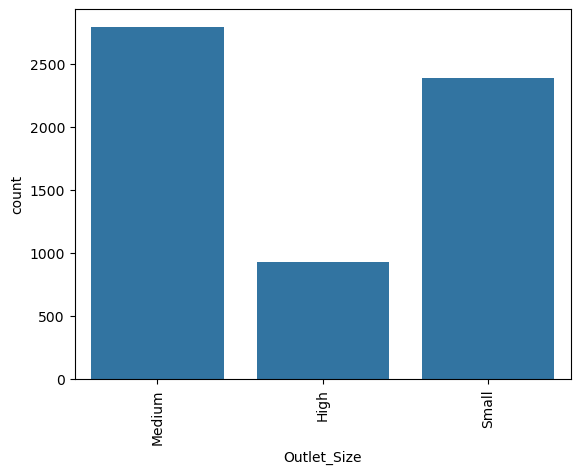

In [13]:
univariate_cat(df,x='Outlet_Size')

In [ ]:
df['Outlet_Size'].value_counts()

In the given situation where "NaN" (Not a Number) values are encountered in a list of unique categories, such as "Medium", "High", "Small", and their corresponding value counts and percentages, there are several options to consider for replacing the "NaN" values:

Replace with the mode: We can replace the "NaN" values with the mode, which is the category that appears most frequently in the dataset. In this case, we would replace the "NaN" values with the category "Medium", as it has the highest count (2793) and percentage (45.69%) among the available categories.

In [16]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

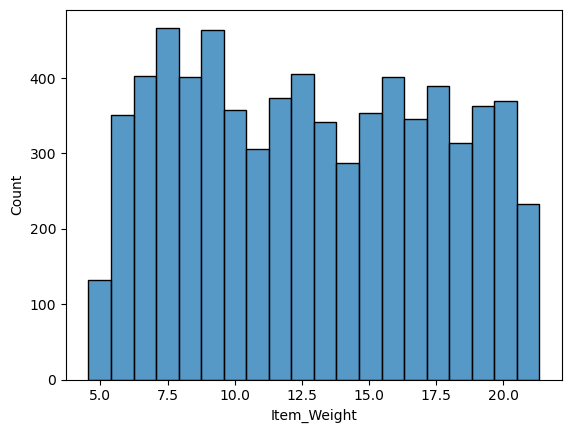

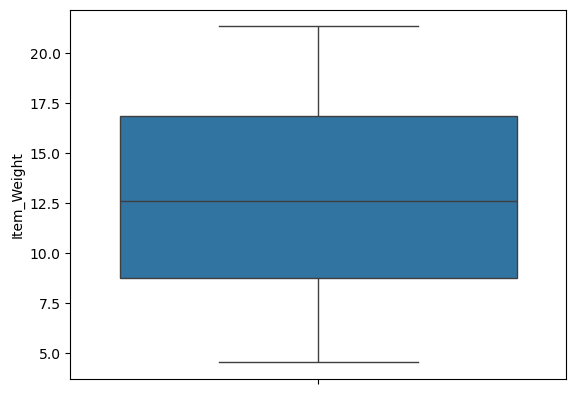

{'missing': 1463,
 'min': 4.55,
 'max': 21.35,
 'mean': 12.86,
 'var': 21.56,
 'std': 4.64,
 'range': 16.8,
 'q1': 8.77,
 'q2': 12.6,
 'q3': 16.85,
 'skewness': 0.08,
 'kurtosis': -1.23}

In [15]:
univariate_num(data=df,x='Item_Weight')


In [ ]:
df['Item_Weight'].value_counts()

In [19]:
mode=df['Item_Weight'].mode()[0]
mode

12.15

In the given situation where a dictionary contains statistical summary values, and one of the values is "NaN" (Not a Number), you may consider the following options for replacing the "NaN" value:

Use data imputation techniques: Depending on the nature and characteristics of your data, you may consider using data imputation techniques, such as mean imputation, median imputation, or regression imputation, to estimate and fill in the missing value based on the values of other variables or statistical properties of the data. For example, you could impute the missing value with the mean, median, or mode of the available data.

In [20]:
df['Item_Weight'].fillna(mode,inplace=True)
df['Outlet_Size'].fillna('Medium',inplace=True)


In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Univariate outlier Treatment

In [ ]:
univariate_cat(data=df,x='Item_Fat_Content') 

In [ ]:
univariate_num(data=df,x='Item_Visibility') 

We do not have any have any parametere to identify its outliers in others words visibility can be in any value of digits.

In [ ]:
univariate_num(data=df,x='Item_Outlet_Sales') 

It's important to note that the absence of outliers in a dataset does not necessarily mean that the data is error-free or that outliers do not exist in the underlying data. It's always crucial to carefully understand and analyze the data context, quality, and distribution characteristics to make informed conclusions about the presence or absence of outliers in a dataset.

# Preparing for model Asigning

In [ ]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient(cmap='Reds')

In [ ]:
for i in df.columns:
    print("------------- {} ------------------".format(i))
    print(df[i].value_counts())
    print()

In [ ]:
# plt.figure(figsize=(15,14))
# cr=df.corr()
# sns.heatmap(cr,cmap='coolwarm',annot=True)
# plt.show()

The correlation matrix for the Bigmart dataset would typically be a square matrix where the rows and columns represent the variables in the dataset, and the cells contain the correlation coefficients. The correlation coefficient is a value that ranges from -1 to 1, with 1 indicating a perfect positive linear relationship, -1 indicating a perfect negative linear relationship, and 0 indicating no linear relationship between the variables.

In [ ]:
df.head()

In [22]:
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'],inplace=True)

In [23]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# Modeling with ML algorithums.

In [24]:
def preprocessing(df, label=None): 
    df=pd.get_dummies(df)
    
    y=df[label]
    X=df.drop(columns=[label])
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
    
    print("X Train shape : {}".format(X_train.shape))
    print("X Test shape : {}".format(X_test.shape))
    
    sc = StandardScaler()
    X_train_scale =sc.fit_transform(X_train)
    X_test_scale =sc.transform(X_test)
    
    return X_train_scale, X_test_scale, y_train, y_test

def built_model(X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    r2 = r2_score(y_test,  y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Print the accuracy metrics
    print("R2 Score:", r2)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)     

In [25]:
X_train_scale, X_test_scale, y_train, y_test =  preprocessing(df, label="Item_Outlet_Sales")

X Train shape : (6392, 35)
X Test shape : (2131, 35)


In [26]:
lr=LinearRegression(n_jobs=-1)
built_model(X_train_scale, X_test_scale, y_train, y_test, lr)

R2 Score: 0.5489381250794834
Root Mean Squared Error (RMSE): 1137.1529819578361
Mean Absolute Error (MAE): 850.1067930153444


In [27]:
rf=RandomForestRegressor(n_jobs=-1)
built_model(X_train_scale, X_test_scale, y_train, y_test, rf)
    

R2 Score: 0.5517039678489615
Root Mean Squared Error (RMSE): 1133.6611964421536
Mean Absolute Error (MAE): 804.2804512285312


In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
built_model(X_train_scale, X_test_scale, y_train, y_test, dt)
  

R2 Score: 0.19941043432103178
Root Mean Squared Error (RMSE): 1514.9761536124329
Mean Absolute Error (MAE): 1068.716477803848


# Assigning Linear Regression Model

# Assigning Decision Tree regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Assigning Random Forest Regressor Model

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)